With updated parameters (delta and temperature T)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(f'data/coords_300_nonoise_diag.csv')
times_nonoise_diag=df['time']
rel_dist_nonoise_diag=abs(df['distance'])
df = pd.read_csv(f'data/coords_300_noise_diag.csv')
times_noise_diag=df['time']
rel_dist_noise_diag=abs(df['distance'])
df = pd.read_csv(f'data/coords_300_nonoise_full.csv')
times_nonoise_full=df['time']
rel_dist_nonoise_full=abs(df['distance'])
df = pd.read_csv(f'data/coords_300_noise_full.csv')
times_noise_full=df['time']
rel_dist_noise_full=abs(df['distance'])

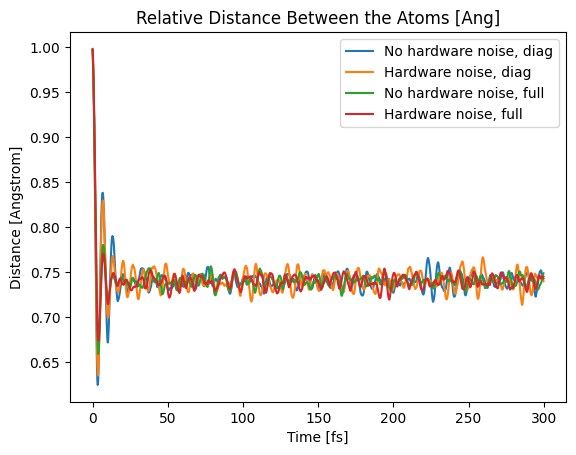

In [3]:
femto = 1.0e-15
dt_femto=0.2
t_therm = 0

plt.plot(times_nonoise_diag[t_therm:]/femto, rel_dist_nonoise_diag[t_therm:], label = "No hardware noise, diag")
plt.plot(times_noise_diag[t_therm:]/femto,   rel_dist_noise_diag[t_therm:],   label = "Hardware noise, diag")
plt.plot(times_nonoise_full[t_therm:]/femto, rel_dist_nonoise_full[t_therm:], label = "No hardware noise, full")
plt.plot(times_noise_full[t_therm:]/femto,   rel_dist_noise_full[t_therm:],   label = "Hardware noise, full")

plt.title('Relative Distance Between the Atoms [Ang]')
plt.xlabel("Time [fs]")
plt.ylabel("Distance [Angstrom]")
plt.legend()
plt.savefig('distance_therm.png')

In [4]:
def ACT(Oi):
    J = len(Oi)
    N_ACT = J-1
    t_ACT_list = np.arange(N_ACT)
    ACT=np.zeros(N_ACT)
    for t_act in t_ACT_list:
        J_delta=J-t_act
        ACT[t_act] = 1/(J-t_act-1)*np.multiply((Oi.iloc[0:(J_delta-1)]-Oi.iloc[0:(J_delta-1)].mean()),(Oi.iloc[t_act:(J-1)]-Oi.iloc[t_act:(J-1)].mean())).sum()
    ACT=ACT/ACT[0]
    ACT[ACT<=0]=1e-10
    return ACT, t_ACT_list    

    

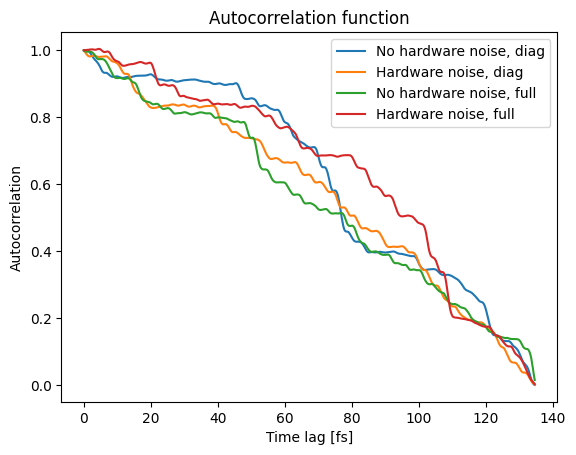

In [5]:
t_therm = 150

ACT_nonoise_diag, t_nonoise_diag = ACT(rel_dist_nonoise_diag[t_therm:])
ACT_noise_diag,   t_noise_diag   = ACT(rel_dist_noise_diag[t_therm:])
ACT_nonoise_full, t_nonoise_full = ACT(rel_dist_nonoise_full[t_therm:])
ACT_noise_full,   t_noise_full   = ACT(rel_dist_noise_full[t_therm:])


cut_id = len(t_nonoise_diag)//2
plt.plot(t_nonoise_diag[:cut_id]*dt_femto, ACT_nonoise_diag[:cut_id], label = "No hardware noise, diag")
plt.plot(t_noise_diag[:cut_id]*dt_femto,   ACT_noise_diag[:cut_id],   label = "Hardware noise, diag")
plt.plot(t_nonoise_full[:cut_id]*dt_femto, ACT_nonoise_full[:cut_id], label = "No hardware noise, full")
plt.plot(t_noise_full[:cut_id]*dt_femto,   ACT_noise_full[:cut_id],   label = "Hardware noise, full")


plt.title('Autocorrelation function')
plt.xlabel("Time lag [fs]")
plt.ylabel("Autocorrelation")

#plt.plot(X*dt_femto*femto, y_fit)
#plt.yscale('log')
plt.legend()
#plt.show()
plt.savefig('ACF.png')

Mean value : 0.7400979297968774
Std : 0.009105471577360113


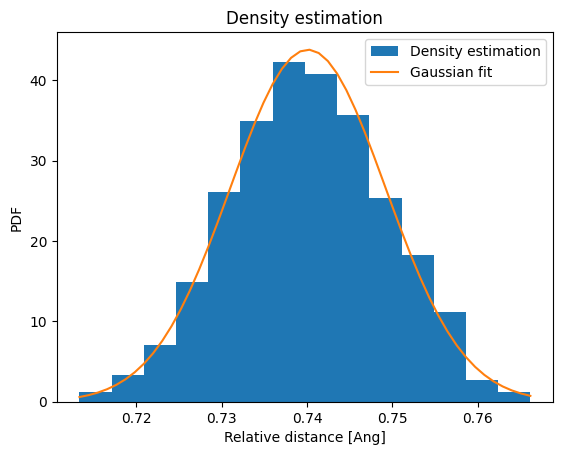

In [10]:

from scipy import stats
dist = rel_dist_noise_diag[t_therm:]
m = dist.mean()
std = dist.std()
x = np.linspace(dist.min(),dist.max())
y_fit = stats.norm.pdf(x, m, std)

print(f'Mean value : {m}')
print(f'Std : {std}')
plt.hist(dist, bins=14, density=True, label='Density estimation')
plt.plot(x,y_fit, label='Gaussian fit')


plt.title('Density estimation')
plt.xlabel("Relative distance [Ang]")
plt.ylabel("PDF")

#plt.plot(X*dt_femto*femto, y_fit)
#plt.yscale('log')
plt.legend()
plt.savefig('density.png')